### Making plots of gene expression from RNAseq DeSEQ2 csv files

In [1]:
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import importlib
import svgutils 
from svgutils.compose import *
#import svgwrite

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

In [2]:
def log2(m):
    if m>0:
        return np.log2(m)
    else:
        return 0
    
def log2series(m):
    tempseries=m
    for i in range(0,len(tempseries)):
        tempseries[i]=log2(tempseries[i])
    return tempseries

def approx(n):
    return round(n*100)/100

def findgene(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def findgenelist(genename):
    !head -1 ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv > ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename ~/Dropbox/LiLab/RNAseq/CSV/zfUVvsS_all.csv >> ~/Dropbox/LiLab/RNAseq/CSV/temp.txt
    gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/CSV/temp.txt")
    return gdf

def formatBars(plotH):
    bars = plotH.get_children()
    for i in range(0,len(bars)):
        if i < 4:
            bars[i].set_facecolor('#B400FF')
        else:
            bars[i].set_facecolor('#3232FF')

def formatFigure_Opsins(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    # axH.set_xticks(n)
    # axH.set_xticklabels(gdf.iloc[0,h_start:h_end].index);
    axH.set_xticks([2.5,7])
    axH.set_xticklabels(['UV','S']);
    
    axH.set_yticks(np.arange(0, 2.5, step=0.5))
    # axH.set_yticklabels([str(i) + ' x 10$^6$' for i in np.arange(0, 2.5, step=0.5)]);
    axH.set_ylabel('norm. counts x 10$^6$', fontproperties=fontLabels)
    
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
#     formatBars(plotH)

def formatFigure_right(genename, figH, axH, plotH):
    formatFigure(genename, figH, axH, plotH)
    axH.set_ylabel('')
    

def formatFigure(genename, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.set_xticks([2.5,7])
    axH.set_xticklabels(['UV','S']);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    axH.yaxis.offsetText.set_fontsize(18)

def formatFigure_list(genelist, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    xTicks = []
    xLabels = []
    for i in range(len(genelist)):
        xTicks = np.append(xTicks, [2.5+(10*i),7+(10*i)])
        xLabels = np.append(xLabels, ['UV','S'])
    axH.set_xticks(xTicks)
    axH.set_xticklabels(xLabels);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_title(genelist, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.yaxis.offsetText.set_fontsize(18)
    

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,5)
    n = np.append(n, 4.5 + np.arange(1,5))
    h_start = 7
    h_end = 15
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(10*i))
        h = np.append(h,temph)
    return n, h

### Good example for opsins with nice format

In [3]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

/Users/angueyraaristjm/Dropbox/LiLab/RNAseq/genePlots/combos


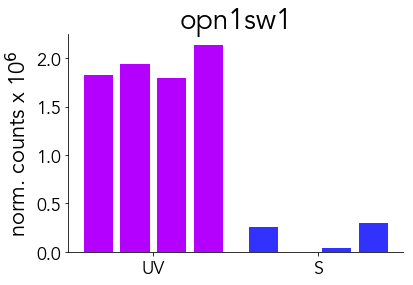

In [4]:
genename = 'opn1sw1'
n,h = plotBars(genename)
h = h / 1e6
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_Opsins(genename, fH, ax, pH)
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

### Generic one (automatic y labels)

> Genes to pay attention to but still haven't given interesting results
> cdh (cadherins)
> protocadherins
> semaphorins
> plexins (plx)
> laminins (lamb) and integrins (itg)
> dystroglycan (dag), dystrophin (dmd), pikachurin
> neurexins
> cadm
> dscam and sidekicks (sdk)
> pappaa


In [3]:
gdf = findgenelist('crb')
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,crb1,"crumbs family member 1, photoreceptor morphoge...",13.61,-0.3338,1.0646,NaN,NaN,9,0,0,2,4,0,94,0,44
1,crb2a,crumbs family member 2a,83.74,0.4530,0.9270,0.374148,0.999194,5,210,248,12,54,43,12,85,6799
2,crb2b,crumbs family member 2b,30.66,0.0384,0.9732,NaN,NaN,0,0,0,138,0,0,0,107,15926
3,crb3a,crumbs homolog 3a,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,26487
4,crb3b,crumbs homolog 3b,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,26486
5,crbn,cereblon,299.23,-0.0874,0.9756,0.754706,0.999194,0,0,423,391,0,741,0,840,14134


In [ ]:
# genename = 'prickle3'
# genename = 'grin1b'
genename = 'cdhr1a'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure(genename, fH, ax, pH)
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

### Plot several genes in a single plot

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

### Proper (and easier) way to do multiple genes is to actually use the subplots

In [ ]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','rhol']
UVline = 1925829.5;
Sline = 824782.34;

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    uvlH = plt.axhline(y=UVline,linewidth=1, linestyle="--", color='#520075', zorder=-1)
    slH = plt.axhline(y=Sline,linewidth=1, linestyle="--", color='#000094', zorder=-1)
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")


In [ ]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("opn1sw.svg").move(0, 290*0),
       SVG("rho.svg").move(0, 290*1),
       SVG("opn1mw.svg").move(-110, 290*2),
       SVG("opn1lw.svg").move(0, 290*3)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

In [ ]:
# genelist = ['saga','sagb','arr3a','arr3b']
# plotName = 'arrestins'

# genelist = ['gngt1','gngt2a','gngt2b']
# plotName = 'gngt'

# genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb5b']
# plotName = 'gnb'

# genelist = ['pde6a','pde6b','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
# plotName = 'pde'

# genelist = ['gucy2d','gucy2f']
# plotName = 'GC'

# genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
# plotName = 'GCAP'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
# plotName = 'CNGalpha'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'

# genelist = ['rgs9a','rgs9b','rgs9bp',
#             'rgs3a','rgs6',
#             'rgs11','rgs12a','rgs16','rgs20']
# plotName = 'RGS'

# genelist = ['grk1a','grk1b',
#             'grk3',
#             'grk4','grk5','grk5l',
#             'grk6',
#             'grk7a','grk7b']
# plotName = 'GRK'

genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
plotName = 'rcvrn'

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

In [ ]:
# genelist = ['ctbp1','ctbp2a']
# plotName = 'ctbp'

# genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
# plotName = 'cadm'

# genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
# plotName = 'tjp'

# genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
# plotName = 'nrxn'

# genelist = ['eml1','eml2','eml3','eml5']
# plotName = 'eml'

# genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
# plotName = 'cpne'

# genelist = ['tbx2a','tbx2b']
# plotName = 'tbx2'

# genelist = ['chn1','chn2']
# plotName = 'chn'

# genelist = ['ncdn','ncdn']
# plotName = 'ztest'

# genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
# plotName = 'sema'

# genelist = ['cacna1aa','cacna1ab',
#             'cacna1da','cacna1db',
#             'cacna1fa','cacna1fb',
#             'cacna2d1a','cacna2d2a',
#             'cacna2d4a','cacna2d4b',
#             'cacna1sb',
#            ]
# plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
# plotName = 'stxBP'

genelist = ['stx4','stx12','stx6',
            'stx8','stx18',
            'stx3a','stx5al']
plotName = 'stx'

            
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=['#B400FF','#B400FF','#B400FF','#B400FF','#3232FF','#3232FF','#3232FF','#3232FF'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

### According to Neuhauss recoverin1a in enriched in rods and UV-cones

In [ ]:
n

### Make heatmap as summary for opsins

In [4]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

#### Opsins

In [25]:
gdf = findgenelist('opn1')
gdf2 = findgene('rho')
gdf2
gdf = gdf.append(gdf2)
gdf.index = range(len(gdf))
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,opn1lw1,"opsin 1 (cone pigments), long-wave-sensitive, 1",430.97,0.0214,0.8864,0.975830,0.999194,780,275,21,680,0,365,1018,308,24299
1,opn1lw2,"opsin 1 (cone pigments), long-wave-sensitive, 2",1263.85,2.4856,1.3984,0.005295,0.114658,5013,298,854,3052,346,260,191,98,24300
2,opn1mw1,"opsin 1 (cone pigments), medium-wave-sensitive, 1",15087.52,0.5824,1.0956,0.234667,0.999194,1760,404,78289,17977,10517,10654,31,1068,25288
3,opn1mw2,"opsin 1 (cone pigments), medium-wave-sensitive, 2",230237.74,0.1458,0.7982,0.790884,0.999194,174061,137342,384061,331380,300822,301345,7432,205460,25291
4,opn1mw3,"opsin 1 (cone pigments), medium-wave-sensitive, 3",44156.77,-0.1726,0.8022,0.716991,0.999194,23519,40013,55986,29441,50157,44689,1962,107486,25290
5,opn1mw4,"opsin 1 (cone pigments), medium-wave-sensitive, 4",737.27,0.3993,0.8734,0.443762,0.999194,1116,2108,228,496,134,156,169,1491,25287
6,opn1sw1,"opsin 1 (cone pigments), short-wave-sensitive 1",1036242.01,2.4592,1.8458,0.009377,0.153527,1831890,1940418,1791047,2139963,253221,1152,39185,293059,21622
7,opn1sw2,"opsin 1 (cone pigments), short-wave-sensitive 2",408535.26,-3.6202,1.7291,0.001142,0.038522,6178,6129,109067,1407,671153,740768,885780,847799,21621
8,rho,rhodopsin,207561.67,-0.0154,0.7499,0.976022,0.999194,395257,106284,66731,252358,367166,93345,272102,107250,9938


In [26]:
data = gdf.iloc[0:9,7:15]
data = data.reindex([6,7,2,3,4,5,0,1,8])
data.index = range(len(data))
np.around(np.divide(data.values,1e6),2)

array([[1.83, 1.94, 1.79, 2.14, 0.25, 0.  , 0.04, 0.29],
       [0.01, 0.01, 0.11, 0.  , 0.67, 0.74, 0.89, 0.85],
       [0.  , 0.  , 0.08, 0.02, 0.01, 0.01, 0.  , 0.  ],
       [0.17, 0.14, 0.38, 0.33, 0.3 , 0.3 , 0.01, 0.21],
       [0.02, 0.04, 0.06, 0.03, 0.05, 0.04, 0.  , 0.11],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.4 , 0.11, 0.07, 0.25, 0.37, 0.09, 0.27, 0.11]])

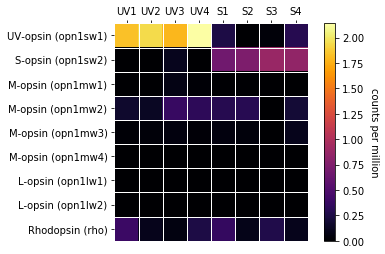

In [27]:
Opsins = ["UV-opsin (opn1sw1)", "S-opsin (opn1sw2)","M-opsin (opn1mw1)","M-opsin (opn1mw2)","M-opsin (opn1mw3)","M-opsin (opn1mw4)","L-opsin (opn1lw1)","L-opsin (opn1lw2)","Rhodopsin (rho)"]
Samples = ["UV1","UV2","UV3","UV4","S1","S2","S3","S4"]
opsinData = np.divide(data.values,1e6)
plotName = "opsinHeatMap"
fig, ax = plt.subplots()

im, cbar = heatmap(opsinData, Opsins, Samples, ax=ax,
                   cmap="inferno", cbarlabel="counts per million")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

#### Semaphorins and cadherins (and others)

In [6]:
plotName = "test"

# gdf = findgenelist('sema')
# plotName = "semaHeatMap"

# gdf = findgenelist('cdh')
# gdf = gdf.drop([26,27])
# gdf = gdf.reindex([0,9,21,22,23,24,25,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20])
# plotName = "cdhHeatMap"

gdf = findgenelist('crb')

# gdf.index = range(len(gdf))
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,UV01,UV02,UV03,UV04,S01,S02,S03,S04,chr-rank
0,crb1,"crumbs family member 1, photoreceptor morphoge...",13.61,-0.3338,1.0646,NaN,NaN,9,0,0,2,4,0,94,0,44
1,crb2a,crumbs family member 2a,83.74,0.4530,0.9270,0.374148,0.999194,5,210,248,12,54,43,12,85,6799
2,crb2b,crumbs family member 2b,30.66,0.0384,0.9732,NaN,NaN,0,0,0,138,0,0,0,107,15926
3,crb3a,crumbs homolog 3a,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,26487
4,crb3b,crumbs homolog 3b,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,26486
5,crbn,cereblon,299.23,-0.0874,0.9756,0.754706,0.999194,0,0,423,391,0,741,0,840,14134


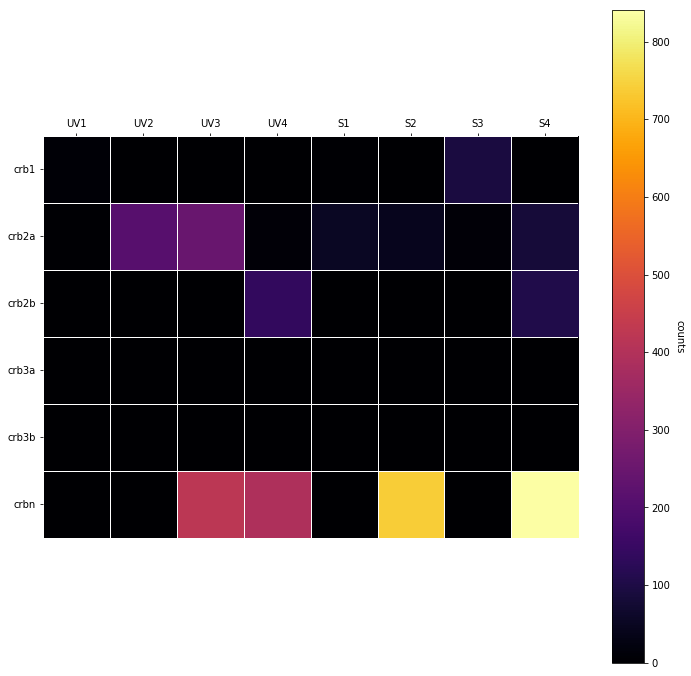

In [7]:
genenames = gdf['symbol'].values
samplenames = ["UV1","UV2","UV3","UV4","S1","S2","S3","S4"]
data = gdf.iloc[0:,7:15].values



fig, ax = plt.subplots(figsize=[12,12])

im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="counts")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")


# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


#### Interesting ones

In [ ]:
!pwd

In [ ]:
Opsins = ["UV-opsin", "S-opsin","M-opsin1","M-opsin2","M-opsin3","M-opsin4","L-opsin1","L-opsin2","Rhodopsin"]
Samples = ["UV01","UV02","UV03","UV04","S01","S02","S03","S04"]

opsinData = np.divide(data.values,1e6)


fig, ax = plt.subplots()
im = ax.imshow(opsinData)

# We want to show all ticks...
ax.set_xticks(np.arange(len(Samples)))
ax.set_yticks(np.arange(len(Opsins)))
# ... and label them with the respective list entries
ax.set_xticklabels(Samples)
ax.set_yticklabels(Opsins)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Opsin expression")
# fig.tight_layout()
plt.show()